<a href="https://colab.research.google.com/github/chenetheophile/ClassificationPanneaux/blob/main/ClassificationPanneauxSignalisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
from keras import utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, AveragePooling2D
from keras import backend as K


In [ ]:
from google.colab import drive
from zipfile import ZipFile
import os
from PIL import Image
drive.mount('/content/drive')
ziplist=['./drive/MyDrive/Classification/GTSRB_Final_Test_Images.zip','./drive/MyDrive/Classification/GTSRB_Final_Training_Images.zip']
for zip in ziplist:
  extrait=ZipFile(zip, "r")
  extrait.extractall('./Classification')
  extrait.close()
def searchImage():
 for root, dirs, files in os.walk("./Classification"):
    path = root.split(os.sep)
    for file in files:
      if ".ppm" in file:
        Image.open(root+'/'+file).save(root+'/'+file[:-3]+"jpeg")
        os.remove(root+'/'+file)

searchImage()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import csv
import matplotlib.pyplot as plt
import os
def readTrafficSign(path):
  images=[]
  labels=[]
  for i in range(len(os.listdir(path))):
    prefix=(path+'/'+format(i,'05d'))+'/'
    getfile=open(prefix+'GT-'+format(i,'05d')+'.csv')
    gtReader=csv.reader(getfile,delimiter=";")
    gtReader.__next__()
    for row in gtReader:
      images.append(plt.imread(prefix+row[0][:-3]+'jpeg'))
      labels.append(row[7])
    getfile.close()
  return images,labels

img,label=readTrafficSign('./Classification/GTSRB/Final_Training/Images')

In [ ]:
batch_size = 32
img_height = 150
img_width = 150

In [ ]:
from tensorflow import keras

train_ds = keras.utils.image_dataset_from_directory(
  directory='Classification/GTSRB/Final_Training/Images',
  image_size=(img_height, img_width),
  batch_size=batch_size)

validation_ds = keras.utils.image_dataset_from_directory(
    directory='Classification/GTSRB/Final_Test/',
    image_size=(img_height, img_width),
    batch_size=batch_size)
class_names=train_ds.class_names

Found 39209 files belonging to 43 classes.
Found 12630 files belonging to 1 classes.


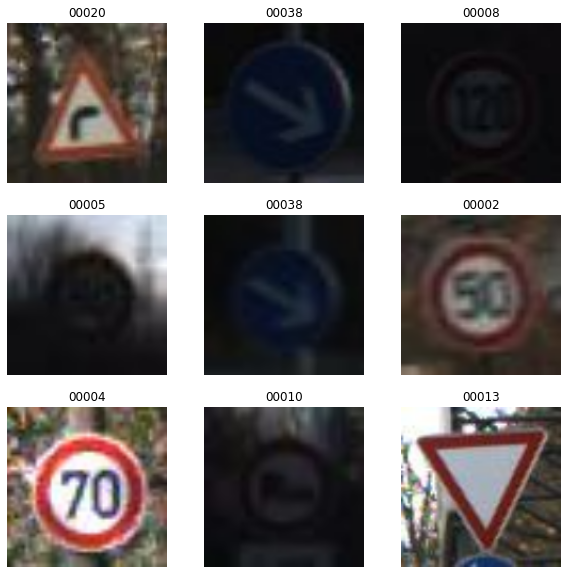

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
print(len(img),len(label))
model = Sequential()
model.add(Conv2D(6, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(img_height,img_width,3)))
model.add(AveragePooling2D())
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(AveragePooling2D())
model.add(Conv2D(120, (3, 3), activation='relu'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(43, activation='softmax'))

model.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
              optimizer='adam',
              metrics=['accuracy'])


#1) In a seperate paper and for each model layer, specify the input/output dimensions
#2) Verify your proposition using a predefined command

model.summary()


39209 39209
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 6)       168       
                                                                 
 average_pooling2d_2 (Averag  (None, 74, 74, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 16)        880       
                                                                 
 average_pooling2d_3 (Averag  (None, 36, 36, 16)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 120)       17400     
                                                                 
 dropout_1 (Dropout)         (None, 34, 34

In [ ]:
print()
epochs=10
history = model.fit(
  train_ds,
  validation_data=validation_ds,
  epochs=epochs
)


Epoch 1/10
1226/1226 [==============================] - 52s 42ms/step - loss: 2.6419 - accuracy: 0.8473 - val_loss: 31.3037 - val_accuracy: 0.0021
Epoch 2/10
1226/1226 [==============================] - 51s 42ms/step - loss: 0.1391 - accuracy: 0.9630 - val_loss: 42.7895 - val_accuracy: 0.0014
Epoch 3/10
1226/1226 [==============================] - 51s 42ms/step - loss: 0.1361 - accuracy: 0.9672 - val_loss: 33.3106 - val_accuracy: 0.0028
Epoch 4/10
1226/1226 [==============================] - 51s 41ms/step - loss: 0.0686 - accuracy: 0.9807 - val_loss: 51.4436 - val_accuracy: 0.0037
Epoch 5/10
1226/1226 [==============================] - 51s 42ms/step - loss: 0.0744 - accuracy: 0.9804 - val_loss: 54.9337 - val_accuracy: 0.0016
Epoch 6/10
1226/1226 [==============================] - 51s 42ms/step - loss: 0.0596 - accuracy: 0.9847 - val_loss: 61.7075 - val_accuracy: 0.0025
Epoch 7/10
1226/1226 [==============================] - 51s 41ms/step - loss: 0.0774 - accuracy: 0.9821 - val_loss: 5